<h3>Compute a spectrogram with consecutive Fourier transforms. </h3>

Spectrograms can be used as a way of visualizing the change of a nonstationary signal’s frequency content over time.



In [90]:
import numpy as np
import scipy.io.wavfile as wav
from scipy.signal import spectrogram
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.ticker import FuncFormatter

def spectrogram_plt(wav_name, fr, to):
    samplerate, samples = wav.read(wav_name)

    t1, t2 = fr, to
    i1, i2 = int(t1 * samplerate), int(t2 * samplerate)
    f, t, Sxx = spectrogram(np.sum(samples[i1:i2,:], axis=1),
                        samplerate, nperseg=512, nfft=4096)
    vmax = Sxx.max()
    vmin = vmax / 1.e5
    plt.pcolormesh(t1 + t, f, Sxx, norm=LogNorm(vmin=vmin, vmax=vmax),
               cmap='YlGnBu_r', shading='auto')

    ax = plt.gca()
    ax.set_yscale('log')
    ax.set_ylim(100, 22000)
    ax.set_yticks([])

    def seconds_to_minsec(t, pos):
        return '{:d}:{:02d}'.format(int(t // 60), int(t % 60))

    xtick_formatter = FuncFormatter(seconds_to_minsec) 
    ax.xaxis.set_major_formatter(xtick_formatter)

    ax.set_xlim(t1, t2)
    plt.show()

Windowlicker, spectrogram between t = 358.76 and 364.63 secs

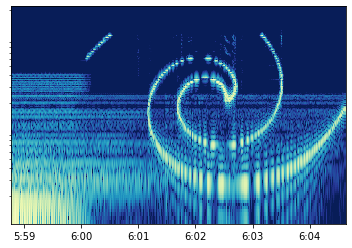

In [87]:
spectrogram_plt('windowlicker.wav', 358.76, 364.63)

Formula, spectrogram between t = 326.67 and 335.60 secs


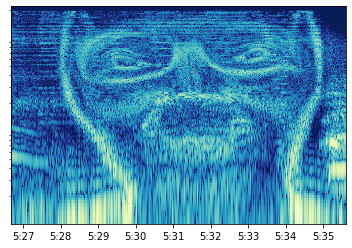

In [88]:
spectrogram_plt('formula.wav', 326.67, 335.60)